In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Dataset.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

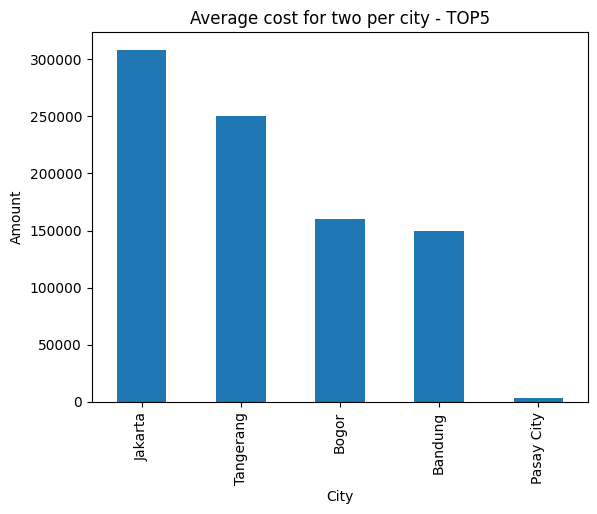

In [16]:
#Group by city and calculate average cost
df.groupby("City")["Average Cost for two"].mean().sort_values(ascending=False).head().plot(kind = "bar")
plt.title("Average cost for two per city - TOP5")
plt.xlabel("City")
plt.ylabel("Amount")
plt.show()

In [23]:
#Cuisines total number of votes
data = df.groupby("Cuisines")["Votes"].sum().reset_index()

In [26]:
data[data["Votes"] != 0]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


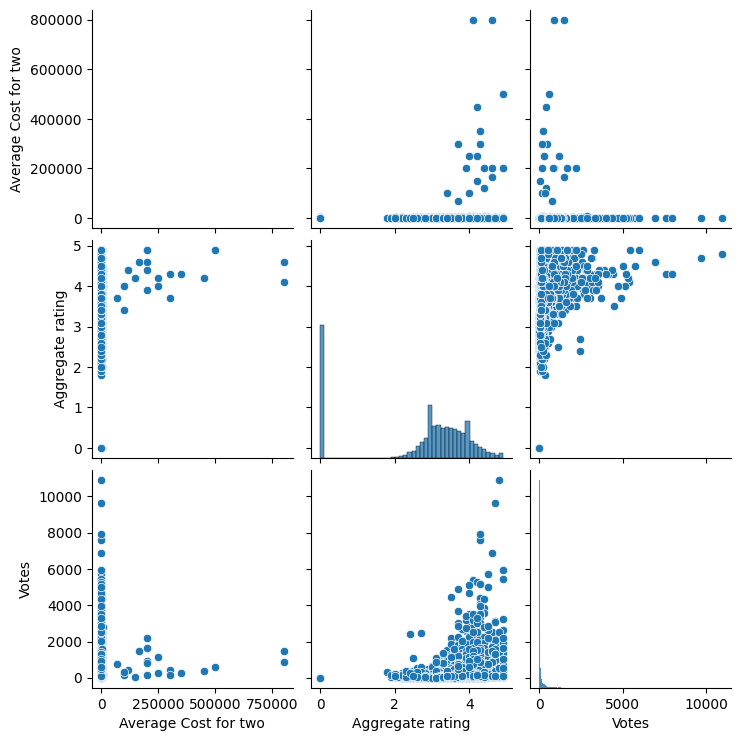

In [27]:
sns.pairplot(df[["Average Cost for two", "Aggregate rating", "Votes"]])

In [30]:
has_delivery = df["Has Online delivery"].value_counts()

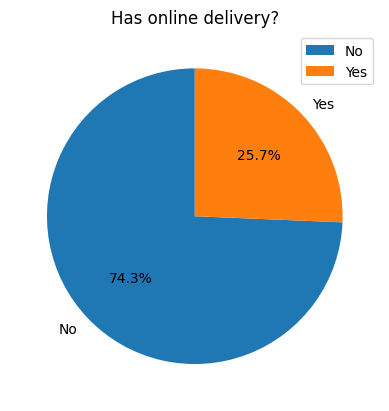

In [35]:
plt.pie(has_delivery, labels = has_delivery.index, startangle= 90, autopct= "%1.1f%%")
plt.title("Has online delivery?")
plt.legend()
plt.show()

In [42]:
df[["Aggregate rating" ,"Rating text"]].sort_values(by = "Aggregate rating", ascending = True).head(5000)

,Aggregate rating,Rating text
6615,0.0,Not rated
1994,0.0,Not rated
1995,0.0,Not rated
1996,0.0,Not rated
1997,0.0,Not rated
...,...,...
9238,3.2,Average
2051,3.2,Average
2832,3.2,Average
143,3.2,Average


In [51]:
rating_text = df[df["Rating text"] != "Not rated"]

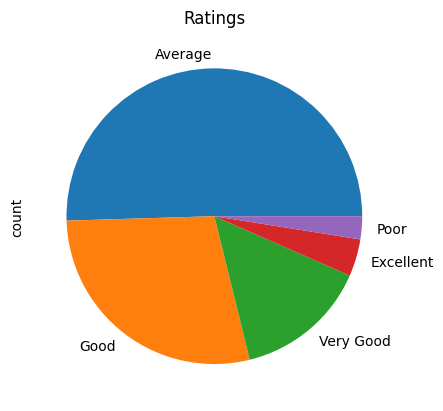

In [58]:
rating_text["Rating text"].value_counts().plot(kind = "pie")
plt.title("Ratings")
plt.show()

In [59]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [61]:
X = df[["Average Cost for two", "Has Table booking", "Has Online delivery", "Price range"]]

In [91]:
y = df[["Aggregate rating"]]

In [63]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,Yes,No,3
1,1200,Yes,No,3
2,4000,Yes,No,4
3,1500,No,No,4
4,1500,Yes,No,4
...,...,...,...,...
9546,80,No,No,3
9547,105,No,No,3
9548,170,No,No,4
9549,120,No,No,4


In [92]:
y

,Aggregate rating
0,4.8
1,4.5
2,4.4
3,4.9
4,4.8
...,...
9546,4.1
9547,4.2
9548,3.7
9549,4.0


In [68]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [83]:
X["Has Online delivery"] = labelencoder.fit_transform(X["Has Online delivery"])

C:\Users\joaot\AppData\Local\Temp\ipykernel_14276\3223307020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Has Online delivery"] = labelencoder.fit_transform(X["Has Online delivery"])


In [84]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,0,3
1,1200,1,0,3
2,4000,1,0,4
3,1500,0,0,4
4,1500,1,0,4
...,...,...,...,...
9546,80,0,0,3
9547,105,0,0,3
9548,170,0,0,4
9549,120,0,0,4


In [86]:
labelencoder.classes_
#0 = no
#1 = yes

array(['No', 'Yes'], dtype=object)

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [88]:
X = scaler.fit_transform(X)

In [89]:
X

array([[-0.0190367 ,  2.37978283, -0.68302371,  1.10671644],
       [-0.0135729 ,  2.37978283, -0.68302371,  1.10671644],
       [ 0.13941344,  2.37978283, -0.68302371,  2.18135204],
       ...,
       [-0.06985002, -0.42020641, -0.68302371,  2.18135204],
       [-0.07258191, -0.42020641, -0.68302371,  2.18135204],
       [-0.07613338, -0.42020641, -0.68302371,  0.03208084]])

In [90]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [97]:
def modelresults(predictions):
    print("Mean absolute error on model is {}".format(mean_absolute_error(y_test,predictions)))
    print("Root mean squared error on model is {}".format(np.sqrt(mean_squared_error(y_test,predictions))))

In [98]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [99]:
lr.fit(X_train, y_train)

LinearRegression()

In [101]:
predictionsfromlr = lr.predict(X_test)

In [102]:
modelresults(predictionsfromlr)

Mean absolute error on model is 0.39723133644355907
Root mean squared error on model is 0.49951874463548124


In [103]:
predictionsfromlr

array([[3.49316582],
       [3.54923005],
       [3.42776737],
       ...,
       [3.54884131],
       [3.88125801],
       [3.227249  ]])

In [104]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [105]:
svrmodel = SVR()

In [107]:
param_gridsvr = {"C" : [0.1,0.5], "kernel" : ["linear", "poly"], "degree" : [2]}

In [110]:
gridsvr = GridSearchCV(svrmodel, param_gridsvr)
gridsvr.fit(X_train, y_train)

c:\Users\joaot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\joaot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\joaot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\joaot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataC

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']})

In [112]:
predsgridsvr = gridsvr.predict(X_test)

In [113]:
modelresults(predsgridsvr)

Mean absolute error on model is 0.382928081740572
Root mean squared error on model is 0.4893733259361417


In [114]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
param_grid = {
    "max_depth" : [10,30],
    "min_samples_leaf" : [1,2],
    "min_samples_split" : [2,5]
}

In [116]:
treemodel = DecisionTreeRegressor()

In [117]:
grid_tree = GridSearchCV(estimator= treemodel, param_grid= param_grid)

In [118]:
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [120]:
treepredictions = grid_tree.predict(X_test)

In [121]:
modelresults(treepredictions)

Mean absolute error on model is 0.3624454929884313
Root mean squared error on model is 0.4645939841736161


In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
rfrmodel = RandomForestRegressor()

In [126]:
param_gridrfr = {
    "max_depth" : [5,15],
    "n_estimators" : [2,5,10]
}

In [127]:
gridrfr = GridSearchCV(rfrmodel, param_gridrfr)

In [128]:
gridrfr.fit(X_train, y_train)

c:\Users\joaot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\joaot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\joaot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\joaot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConvers

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [129]:
randomforestpredictions = gridrfr.predict(X_test)

In [130]:
modelresults(randomforestpredictions)

Mean absolute error on model is 0.3608928483583617
Root mean squared error on model is 0.46152365972311776


In [132]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [133]:
grid_tree.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [147]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn_param_grid = {
    "n_neighbors" : [9,11,13,16,17,18]
}
knn_grid_search = GridSearchCV(knn, knn_param_grid)

In [148]:
knn_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [9, 11, 13, 16, 17, 18]})

In [149]:
knnpreds = knn_grid_search.predict(X_test)

In [150]:
modelresults(knnpreds)

Mean absolute error on model is 0.3667266861730062
Root mean squared error on model is 0.47069984044374424


In [151]:
knn_grid_search.best_params_

{'n_neighbors': 18}

In [152]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada_param_grid = {
    "n_estimators" : [50,100,200],
    "learning_rate" : [0.1,0.5,1]
}
ada_grid_search = GridSearchCV(ada, ada_param_grid)

In [153]:
ada_grid_search.fit(X_train,y_train)

c:\Users\joaot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\joaot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\joaot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\joaot\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataC

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]})

In [154]:
adapreds = ada_grid_search.predict(X_test)

In [155]:
modelresults(adapreds)

Mean absolute error on model is 0.3727845952271684
Root mean squared error on model is 0.4702803349967959


In [156]:
gridrfr

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [157]:
import joblib
joblib.dump(gridrfr,"mlmodel.pkl")

['mlmodel.pkl']